Using Decesion Tree Algorithm for Predicting Accident Prone Hotspots

In [4]:
#import files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


#load csv
data=pd.read_csv("/content/300csv.csv",sep=',',header=0)

In [5]:
print("data length-",len(data))
print("data shape-",data.shape)

data length- 300
data shape- (300, 12)


In [6]:
data.head()

,Index,longitude,latitude,Severity,No_of_casualties,Speed,Weather,Road_surface,Alcohol,Gradient,Intersection,Accident
0,0,73.853211,18.503563,1,2,36,2,1,0,0,0,1
1,1,73.755087,18.588572,2,0,128,2,1,1,0,0,1
2,2,73.804047,18.527384,0,0,131,2,2,0,0,0,0
3,3,73.836711,18.582195,2,2,99,3,2,1,1,0,0
4,4,73.880856,18.557025,0,3,134,1,3,1,1,1,0


In [7]:
# separating target variable
X=data.values[:,2:10]
Y=data.values[:,11]

#splitting data into train and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [8]:
#function to perform training with entropy
clf_entropy=DecisionTreeClassifier(
    criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5
)
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [9]:
#prediction
Y_pred=clf_entropy.predict(X_test)
testdf=data.iloc[int(0.8 * len(data)):]
testdf.insert(12,"Prediction",Y_pred)
print(Y_pred)

[0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]


In [10]:
#checking accuracy - 60% for max_depth=4 and split 80,20
print(Y_test)
print("Accuracy ->"),accuracy_score(Y_test,Y_pred)*100

[1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
Accuracy ->


(None, 50.0)

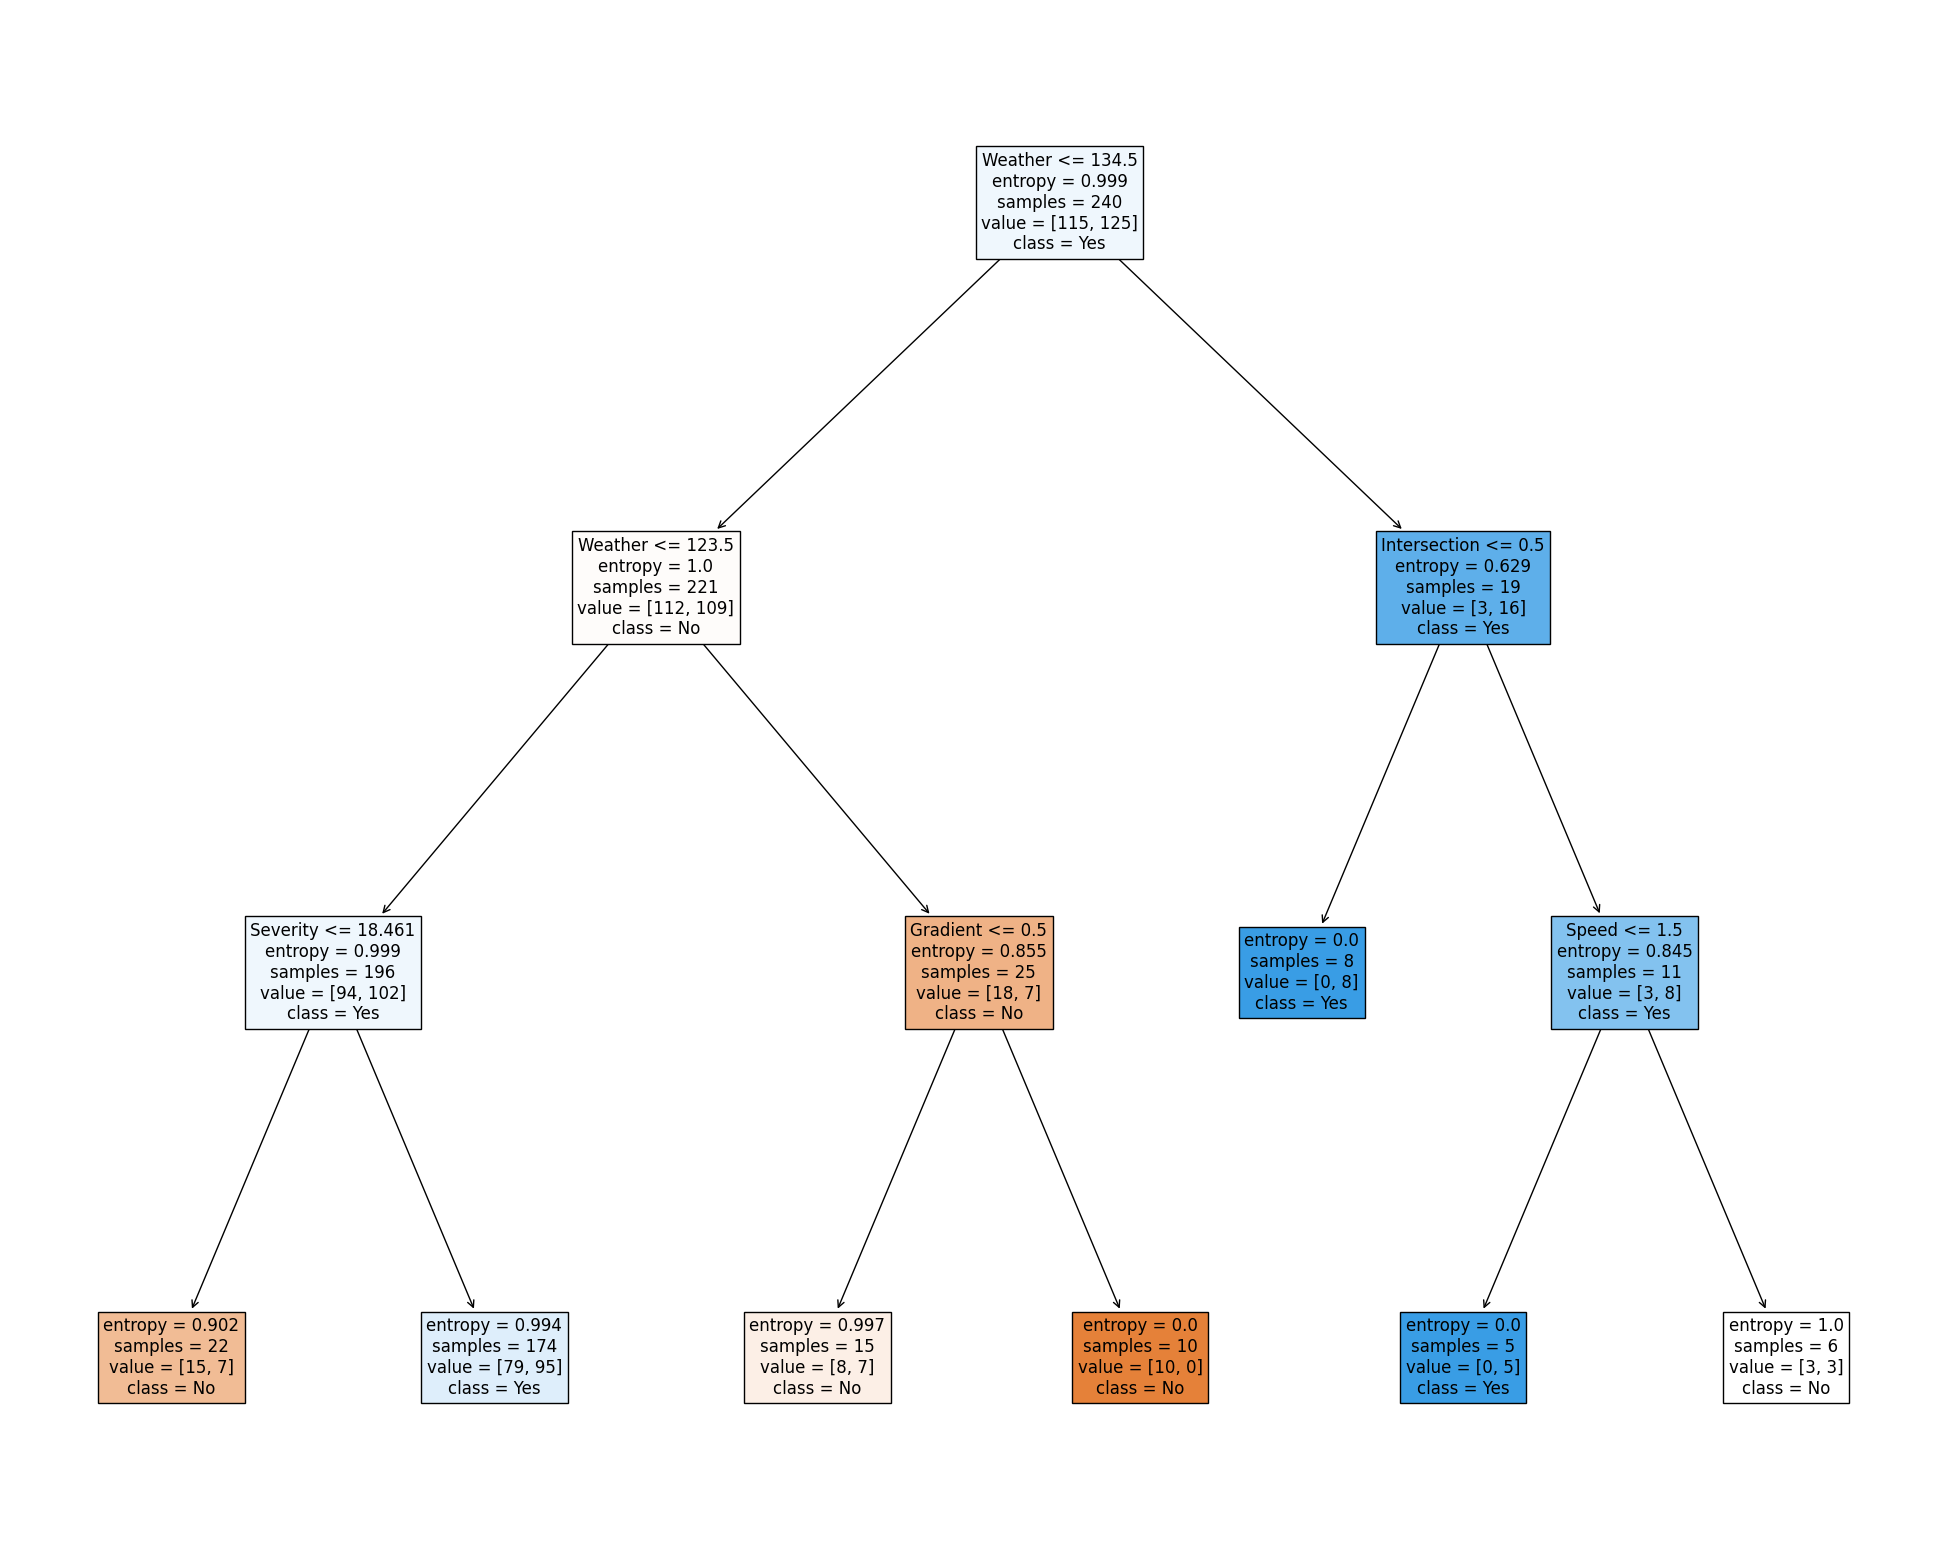

In [11]:
from sklearn import tree
from matplotlib import pyplot as plt
#draw tree
feature_names=["Severity","No_of_casualties","Speed","Weather","Road_surface","Alcohol","Gradient","Intersection"]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy,
                   feature_names=feature_names,
                   class_names={0:'No', 1:'Yes'},
                   filled=True,
                  fontsize=12)


In [ ]:
pip install gmplot

In [13]:
import gmplot
# GoogleMapPlotter return Map object

#Plotting graph on Google maps using gmplot library
gmap3 = gmplot.GoogleMapPlotter(18.516726,73.856255, 13)

#Plotting all data according to the severity of accident
for i,j in data.iterrows():
    if(j['Severity']==0):
        gmap3.heatmap( [j['latitude']], [j['longitude']])
    if(j['Severity']==1):
        gmap3.heatmap( [j['latitude']], [j['longitude']])
    if(j['Severity']==2):
        gmap3.heatmap( [j['latitude']], [j['longitude']])

# Pass the absolute path
gmap3.draw( "maptemp.html" )

ModuleNotFoundError: No module named 'gmplot'

In [ ]:
#Plotting predictions
gmap3 = gmplot.GoogleMapPlotter(18.516726,73.856255, 13)

for i,j in testdf.iterrows():
  if (j['Prediction']==1):
    gmap3.scatter( [j['latitude']], [j['longitude']], 'red', size =300, marker = False)
gmap3.draw( "maptemp.html" )

In [ ]:
#Plotting TP, TN, FP, FN
gmap3 = gmplot.GoogleMapPlotter(18.516726,73.856255, 13)
for i,j in testdf.iterrows():
  if ((j['Prediction']==1 and j['Accident']==1) or (j['Prediction']==0 and j['Accident']==0)):
    gmap3.scatter( [j['latitude']], [j['longitude']], 'red', size = 300, marker = False)
  if ((j['Prediction']==0 and j['Accident']==1) or (j['Prediction']==1 and j['Accident']==0)):
    gmap3.scatter( [j['latitude']], [j['longitude']], 'yellow', size = 300, marker = False)
gmap3.draw( "maptemp.html" )